# Überwachtes Lernen (engl. Supervised Learning)

Dieses Notebook ist Teil des Projekts [EmbedML](https://hahn-schickard.de/projekte/embedml) und basiert auf den Inhalten des Kapitels [Überwachtes Lernen (engl. Supervised Learning)](https://hahn-schickard.gitbook.io/embedml/2_ml/2.4_ueberwachtes_lernen). Es ist auf [Colab]() und im [GitHub-Repository von Hahn-Schickard]() zu finden.

Installation der benötigten Bibliotheken in den angegebenen Versionen.

In [2]:
!pip install numpy==1.26.4 matplotlib==3.8.0 seaborn==0.13.2 scikit-learn==1.5.2 mlxtend==0.23.2 > /dev/null 2>&1

Das System kann den angegebenen Pfad nicht finden.


Zuerst werden die benötigten Packages importiert.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Lineare Regression


Der folgende Code generiert 100 Datenpunkte mit Rauschen, trainiert ein lineares Regressionsmodell und plottet die Datenpunkte sowie die Regressionslinie. Der `plt.scatter`-Befehl zeichnet die originalen Datenpunkte, während `plt.plot` die berechnete Regressionslinie zeichnet.

Es folgt die Generierung von 100 Datenpunkten, mit Werten zwischen 0 und 10.
Den Daten wird mit `np.random.normal(...)` zusätzliches normalverteiltes Rauschen zugerechnet.

In [4]:
n = 100
x = np.linspace(0, 10, n).reshape(-1, 1)
y = 2.0 * x.flatten() + 1.0 + np.random.normal(0, 2, n)

Mit der Klasse `LinearRegression` von `sklearn` kann ein lineares Regressionsmodell erzeugt werden welches dann mit der `.fit`-Funktion auf die `x`-Daten mit den `y`-Labels trainiert wird.

In [5]:
model = LinearRegression()

model.fit(x, y);

Nach dem Training kann die Steigung der Koeffizientengeraden ausgegeben werden und der Wert an welchem die y-Achse geschnitten wird.

In [6]:
print(f"Steigung (m): {model.coef_[0]}")
print(f"Achsenabschnitt (b): {model.intercept_}")

Steigung (m): 2.149440908959073
Achsenabschnitt (b): 0.5253464263460579


Mit `model.pred(...)` können Vorhersagen zu neuen Werten in Bezug auf das Modell getroffen werden welchen y-Wert diese erhalten sollten.

In [7]:
y_pred = model.predict(x)

Mithilfe der `plt`-Bibliothek kann ein Diagramm erzeugt werden in welchem die Datenpunkte  als blaue Punkte zu sehen sind und die gelernte Regressionslinie als rote Gerade.

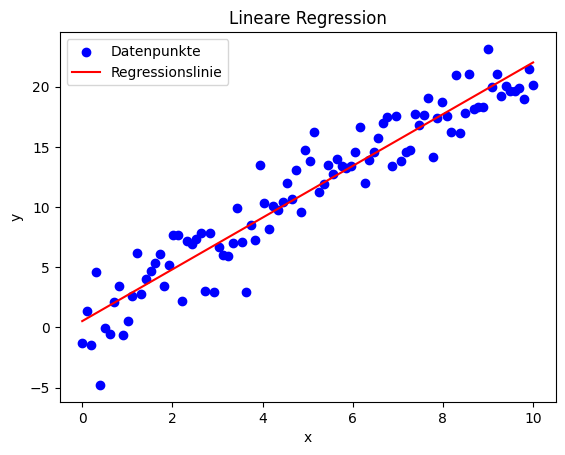

In [8]:
plt.scatter(x, y, color='blue', label='Datenpunkte')
plt.plot(x, y_pred, color='red', label='Regressionslinie')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lineare Regression')
plt.legend()
plt.show()

## Logistische Regression

Der Iris-Datensatz wird geladen.

In [9]:
iris = load_iris()

X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Durch die Klasse `LogisticRegression` kann ein logistisches Regressionsmodell erzeugt werden. Der Parameter `max_iter` legt die maximale Anzahl an Iterationen fest, welche das Model verwenden kann um sich den Daten anzupassen.

Die `.fit`-Funktion trainiert das Model auf die Iris-Daten.

In [10]:
logreg = LogisticRegression(max_iter=200)

logreg.fit(X_train, y_train.ravel());

Mit der `.predict`-Funktion werden die Label der `X_test`Daten bestimmt.

Es wird die Genauigkeit, die Konfusionsmatrix und ein Klassifikationsbericht ausgegeben. Die Genauigkeit liegt bei 100%. In der Konfusionsmatrix sieht man das 19 Datenwerte richtig der ersten Klasse, 13 richtig der zweiten Klasse und 13 richtig deer dritten klasse zugeordnet wurden. Im Klassifikationsbericht können weitere Metriken begutachtet werden.

In [11]:
predictions = logreg.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, predictions)}\n")
print(f"Classification Report:\n{classification_report(y_test, predictions)}\n")

Accuracy: 1.00

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45




Folgend ist ein Plot zu sehen, welcher aufzeigt, dass die drei Klassen des Datensatzes anhand zweier Merkmale klassifiziert werden kann.

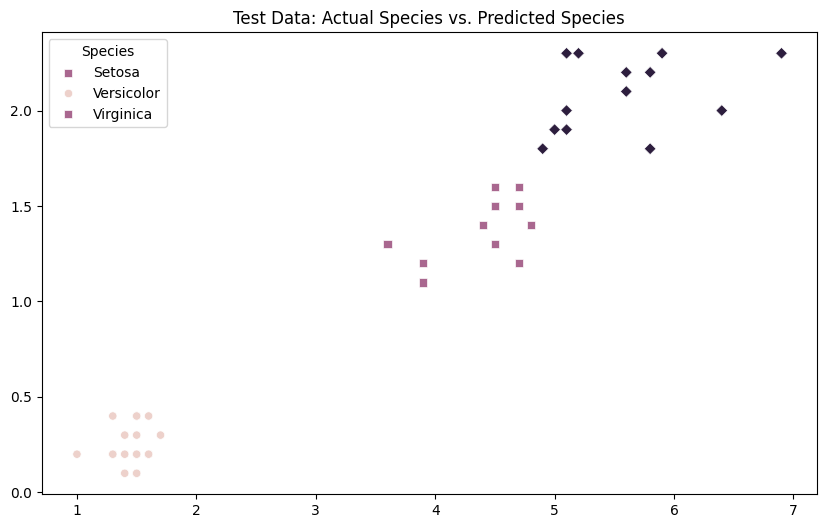

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:,2], y=X_test[:,3], hue=y_test.ravel(), style=predictions, markers=["o", "s", "D"])
plt.title('Test Data: Actual Species vs. Predicted Species')
plt.legend(title='Species', loc='upper left', labels=['Setosa', 'Versicolor', 'Virginica'])
plt.show()


## Entscheidungsbäume (engl. Decision Trees)

Der folgende Code lädt den Iris-Datensatz und verwendet nur die Petal-Länge und -Breite als Features. Die Daten werden in Trainings- und Testdatensätze aufgeteilt, und ein Entscheidungsbaum-Klassifizierer wird mit einer maximalen Tiefe von 3 trainiert. Schließlich wird die Genauigkeit des trainierten Modells auf den Testdaten berechnet und ausgegeben.

Laden des Iris-Datensatzes und Trainingsdaten und -label definieren. Es werden nur die Petal-Länge und -Breite verwendet. Danach erfolgt die Aufteilung des Datensatzes in Trainings- und Testdaten

In [13]:
iris = load_iris()

X, y = iris.data[:, 2:], iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Folgend wird der Entscheidungsbaum initiiert und mit `.fit` auf die Daten und die Label trainiert.

In [14]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train);

Danach kann die Genauigkeit des Modells ausgegeben werden. Aufgrund der einfachen Daten kann das Modell eine Genauigkeit von 100% erreichen.

In [15]:
accuracy = tree_clf.score(X_test, y_test)
print(f"Genauigkeit des Modells: {accuracy:.2f}")

Genauigkeit des Modells: 1.00


Im Folgenden wird der trainierte Entscheidungsbaum visualisiert. Mit der Funktion `plot_tree` wird der trainierte Entscheidungsbaum `tree_clf` dargestellt.

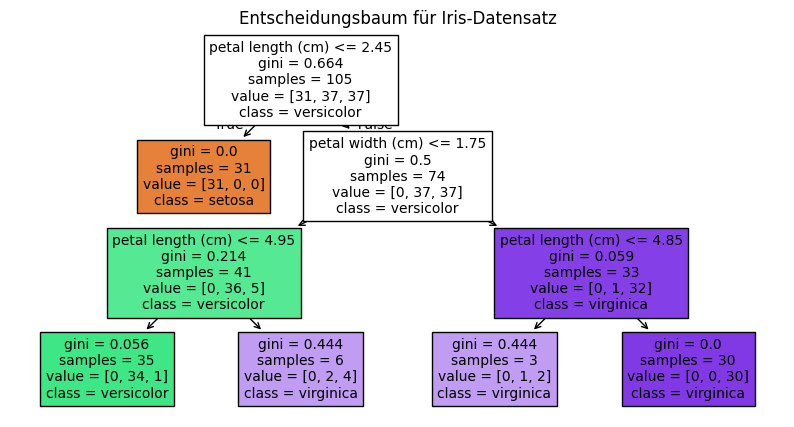

In [16]:
plt.figure(figsize=(10,5))
plot_tree(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names, filled=True)
plt.title("Entscheidungsbaum für Iris-Datensatz")
plt.show()

## Ensemblemethoden und Random Forest

Der Iris-Datensatz geladen und in Test- und Trainingsdaten aufgeteilt.

In [17]:
iris = load_iris()

X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Ein Random-Forest-Klassifikationsmodell wird aufgebaut und trainiert.

In [18]:
model = RandomForestClassifier()

model.fit(X_train, y_train);

Nach dem Training kann die Genauigkeit des Modells ausgegeben werden.

In [19]:
accuracy = model.score(X_test, y_test)
print(f"Genauigkeit des Random-Forest-Modells: {accuracy:.2f}")

Genauigkeit des Random-Forest-Modells: 1.00


Hier werden die ersten 3 erzeugten Entscheidungsbäume visualisiert. Insgesamt wurden 100 solcher Entscheidungsbäume erzeugt.

Anzahl der erzeugten Entscheidungsbäume:  100


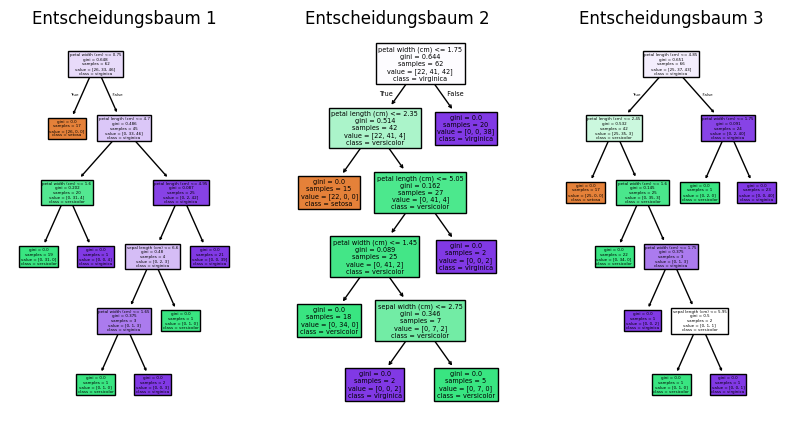

In [20]:
plt.figure(figsize=(10, 5))
print("Anzahl der erzeugten Entscheidungsbäume: ", len(model.estimators_))
for i in range(3):  # Hier werden die ersten 3 Bäume visualisiert
    plt.subplot(1, 3, i + 1)
    plot_tree(model.estimators_[i], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
    plt.title(f"Entscheidungsbaum {i+1}")
plt.show()

Hier werden die Features nach ihrer wichtigkeit dargestellt. Das Modell bewertet je nachdem welche Bäume durch welche Regeln zu ihren Klassifizierungsregeln kommt und gibt an, welche Features vorallem für die Regeln von Bedeutung waren.

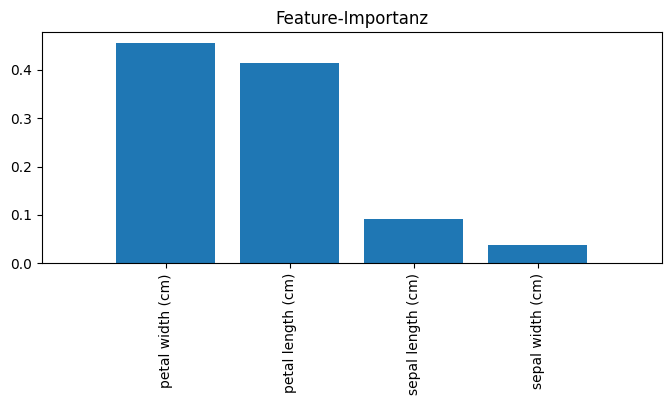

In [21]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = iris.feature_names

plt.figure(figsize=(8, 3))
plt.title("Feature-Importanz")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## Support Vector Machine (SVM) und Support Vector Regression (SVR)

Im folgenden Code wird der Iris Datensatz geladen und in Test und Trainingsdaten unterteilt. Aufgrund der späteren 2D-Visualisierung werden nur zwei Merkmale der Daten verwendet.

In [22]:
iris = load_iris()

# Testen Sie, wie sich die Genauigkeit verhält, wenn Sie [:, :2] löschen (beachten Sie, dass die Visualisierung dann nicht mehr funktionieren wird)
X, y = iris.data[:, :2], iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Nachdem die Daten vorbereitet wurden, wird ein SVM-Modell (`SVC` - Support Vector Classifier) erzeugt und trainiert. Als Kernel-Funktion wird `linear` als Parameter hinterlegt.

In [23]:
svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train);

Die Genauigkeit des Modells wird anschhließend auf den Testdaten kontrolliert.

In [24]:
accuracy = svm_model.score(X_test, y_test)
print("Genauigkeit des SVM-Modells:", accuracy)

Genauigkeit des SVM-Modells: 0.9


Im folgenden Abschnitt werden die Klassifikationgrenzen des SVM-Modells visualisiert. Es ist zu beachten, dass aufgrund der Einschränkung auf 2 Merkmale (Breite und Länge der Blütenblätter) nicht alle Daten richtig klassifiziert werden können und aufgrund dessen bei Klasse 1 und 2 Fehler auftreten. Daten welche umkreist sind, haben einen besonders großen Einfluss auf die Bereiche der Klassen.

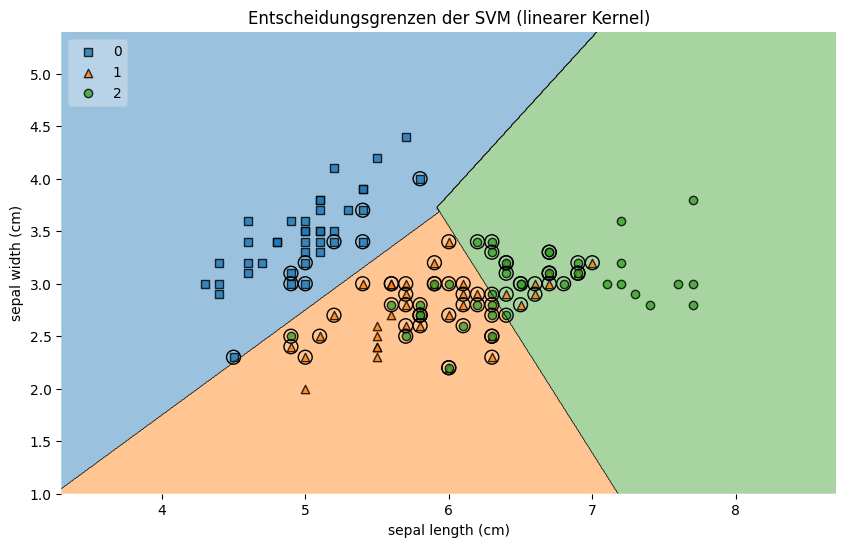

In [25]:
support_vectors = svm_model.support_vectors_

plt.figure(figsize=(10, 6))
plot_decision_regions(X_train[:, :2], y_train, clf=svm_model, legend=2)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vektoren')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Entscheidungsgrenzen der SVM (linearer Kernel)')
plt.show()

## k-Nearest Neighbors (k-NN)


Der Iris-Datensatz wird geladen und in Trainings- und Testdaten aufgeteilt, wobei nur die ersten beiden Merkmale der Daten verwendet werden. Ein K-Nearest Neighbors (KNN)-Modell mit 3 Nachbarn wird erstellt, trainiert und auf den Testdaten evaluiert, um die Genauigkeit des Modells zu bewerten und auszugeben.

In [26]:
iris = load_iris()

# Hier kann getestet werden, wie sich die Genauigkeit verhält, wenn [:, :2] gelöscht wird (die Visualisierung wird dann nicht mehr funktionieren)
X, y = iris.data[:, :2], iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Im Folgenden wird ein k-NN-Modell erstellt und trainiert. Der Algorithmus wird so konfiguriert, dass er die drei nächstgelegenen Nachbarn berücksichtigt, um zu entscheiden, ob ein Punkt einem Cluster zugeordnet wird oder nicht.

In [27]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train);

In [28]:
accuracy = model.score(X_test, y_test)
print("Genauigkeit des K-Nearest Neighbors-Modells:", accuracy)

Genauigkeit des K-Nearest Neighbors-Modells: 0.7555555555555555


Hier wird das Ergebnis des k-NN-Algorithmus visualisiert. Es ist wichtig zu beachten, dass durch die Reduzierung auf zwei Merkmale nicht mit vollständiger Genauigkeit bestimmt werden kann, welcher Lilienart ein Punkt zuzuordnen ist. Dennoch zeigt die Visualisierung anschaulich, dass der k-NN-Algorithmus in diesem Beispiel eine deutlich höhere Flexibilität aufweist als eine SVM.

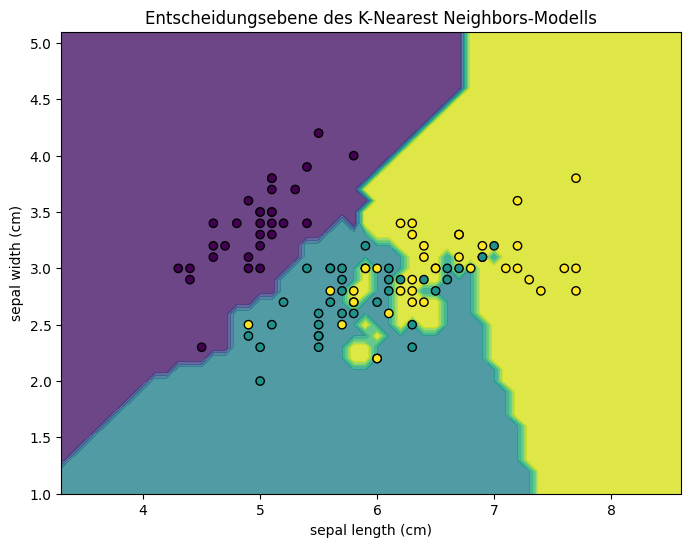

In [29]:
# Funktion zur Erstellung eines 2D-Plots der Entscheidungsebene
def plot_decision_surface(ax, model, X, y):
    # Grenzen für die Features definieren
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Erstellen eines Mesh-Grids für die Visualisierung
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Vorhersagen über das Mesh-Grid treffen
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Entscheidungsebene in 2D plotten
    ax.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title('Entscheidungsebene des K-Nearest Neighbors-Modells')

# Plot der Entscheidungsebene in 2D
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_surface(ax, model, X_train, y_train)
plt.show()